In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [8]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=25,random_state=0)

In [9]:
#create tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [10]:
y_test

tensor([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0])

In [25]:
class ANN(nn.Module):
  def __init__(self,ind_feature=8,hidden1=20,hidden2=20,out_feature=2):
      super().__init__()
      self.f_connected1=nn.Linear(ind_feature,hidden1)
      self.f_connected2=nn.Linear(hidden1,hidden2)
      self.out=nn.Linear(hidden2,out_feature)
  def forward(self,x):
      x=F.relu(self.f_connected1(x))
      x=F.relu(self.f_connected2(x))
      x=self.out(x)
      return x


In [12]:
torch.manual_seed(20)
model=ANN()

In [13]:
model.parameters

<bound method Module.parameters of ANN(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [14]:
##back propogation
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [15]:
epochs=500
final_loss=[]
for i in range(epochs):
    i+=1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_loss.append(loss)
    if i%10==1:
      print('Epoch number {} and loss {}'.format(i,loss))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number 1 and loss 3.543234348297119
Epoch number 11 and loss 0.8061351180076599
Epoch number 21 and loss 0.6056672930717468
Epoch number 31 and loss 0.6031180024147034
Epoch number 41 and loss 0.5804688334465027
Epoch number 51 and loss 0.567955732345581
Epoch number 61 and loss 0.5591071844100952
Epoch number 71 and loss 0.5507714748382568
Epoch number 81 and loss 0.5439164638519287
Epoch number 91 and loss 0.5374542474746704
Epoch number 101 and loss 0.5305027365684509
Epoch number 111 and loss 0.5252046585083008
Epoch number 121 and loss 0.5195470452308655
Epoch number 131 and loss 0.513309895992279
Epoch number 141 and loss 0.5071619153022766
Epoch number 151 and loss 0.5011925101280212
Epoch number 161 and loss 0.4954221844673157
Epoch number 171 and loss 0.48783302307128906
Epoch number 181 and loss 0.48066627979278564
Epoch number 191 and loss 0.475715309381485
Epoch number 201 and loss 0.4698440730571747
Epoch number 211 and loss 0.46290940046310425
Epoch number 221 and l

RuntimeError: ignored

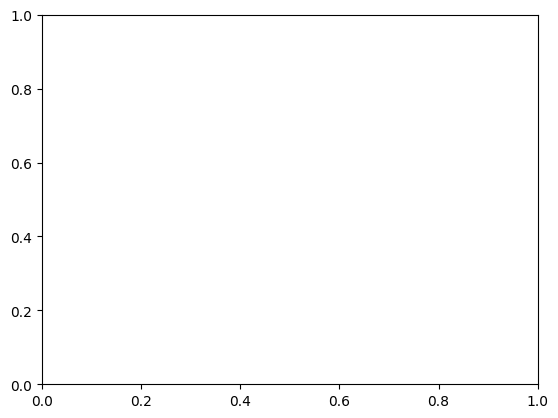

In [16]:
plt.plot(range(epochs),final_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [17]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0


In [18]:
accuracy_score(y_test,predictions)

0.72

In [19]:
torch.save(model,'ann_model.pt')

In [20]:
m=torch.load('ann_model.pt')

In [21]:
m.eval()

ANN(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [36]:
new_data=[3.0, 99.0, 1.0, 1.0, 58.9, 0.500, 53.0,33.0]

In [31]:
new_data

[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0]

In [37]:
tensor_data=torch.tensor(new_data)

In [38]:
with torch.no_grad():
  print(m(tensor_data).argmax())


tensor(0)


In [29]:
df.iloc[43,:]

Pregnancies                   9.000
Glucose                     171.000
BloodPressure               110.000
SkinThickness                24.000
Insulin                     240.000
BMI                          45.400
DiabetesPedigreeFunction      0.721
Age                          54.000
Outcome                       1.000
Name: 43, dtype: float64